170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 29s 14ms/step - loss: 2.3034 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3028 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 2

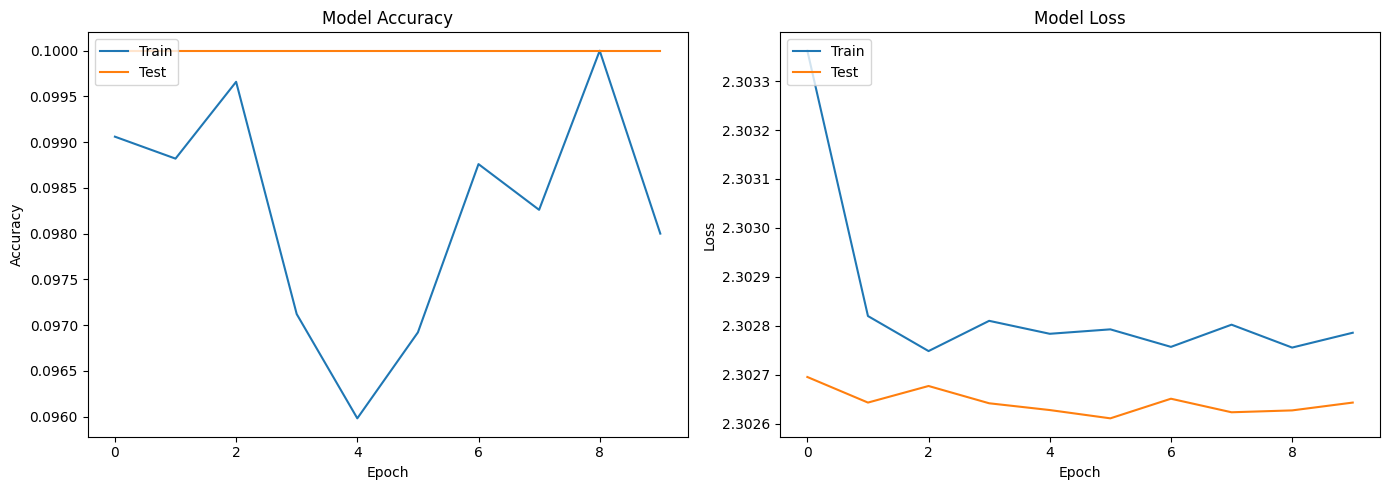

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define AlexNet model with modified input shape
model = models.Sequential()

model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(256, (5, 5), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(384, (3, 3), padding="same", activation='relu'))
model.add(layers.Conv2D(384, (3, 3), padding="same", activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for CIFAR-10

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to categorical format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)



# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



The above code uses Alexnet fro the CIFR 10 dataset. We obsere the loss or the accuracy do not imrpove over time and we need to reduce the complexity of the network.

Epoch 1/10
1563/1563 [==============================] - 15s 7ms/step - loss: 1.6313 - accuracy: 0.3874 - val_loss: 1.2411 - val_accuracy: 0.5502
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1962 - accuracy: 0.5779 - val_loss: 1.1050 - val_accuracy: 0.6115
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0149 - accuracy: 0.6495 - val_loss: 0.9610 - val_accuracy: 0.6675
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9008 - accuracy: 0.6918 - val_loss: 0.9101 - val_accuracy: 0.6864
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8193 - accuracy: 0.7213 - val_loss: 0.9185 - val_accuracy: 0.6923
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7473 - accuracy: 0.7455 - val_loss: 0.8569 - val_accuracy: 0.7125
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6857 - accuracy: 0.7645 - val_loss: 0.8774 - val_acc

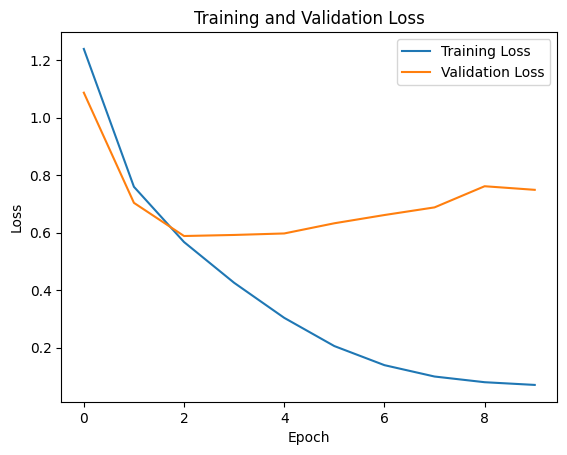

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Simplified AlexNet model for CIFAR-10
model = models.Sequential([
    layers.Conv2D(48, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Report training and validation loss and accuracy
training_loss, training_accuracy = history.history['loss'][-1], history.history['accuracy'][-1]
validation_loss, validation_accuracy = history.history['val_loss'][-1], history.history['val_accuracy'][-1]

# Report the number of parameters
total_params = model.count_params()

print(f"Training Loss: {training_loss}")
print(f"Training Accuracy: {training_accuracy}")
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")
print(f"Total number of parameters in the simplified model: {total_params}")




# Print final validation accuracy
print(f'Final Validation Accuracy: {val_accuracy_list[-1]}%')
# Calculate total number of parameters
total_params = sum(p.numel() for p in net.parameters())
print(f'Total number of parameters in the model: {total_params}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/ResNet_training_validation_loss.png')
plt.show()


I have reduued the complexity of the above network by creating fewer





The below code

Epoch 1/20
1563/1563 [==============================] - 13s 7ms/step - loss: 1.7051 - accuracy: 0.3541 - val_loss: 1.4043 - val_accuracy: 0.4924
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2230 - accuracy: 0.5667 - val_loss: 1.1436 - val_accuracy: 0.6013
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0335 - accuracy: 0.6406 - val_loss: 0.9889 - val_accuracy: 0.6617
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9099 - accuracy: 0.6877 - val_loss: 0.9448 - val_accuracy: 0.6755
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8222 - accuracy: 0.7191 - val_loss: 0.9032 - val_accuracy: 0.6927
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7530 - accuracy: 0.7443 - val_loss: 0.8660 - val_accuracy: 0.7089
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7017 - accuracy: 0.7608 - val_loss: 1.0224 - val_accu

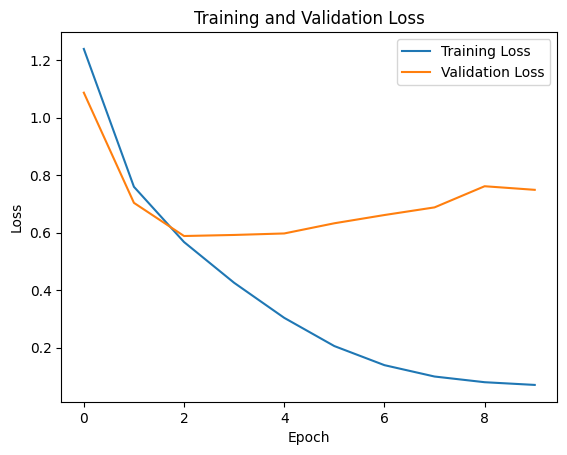

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Simplified AlexNet model for CIFAR-10
model = models.Sequential([
    layers.Conv2D(48, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

# Report training and validation loss and accuracy
training_loss, training_accuracy = history.history['loss'][-1], history.history['accuracy'][-1]
validation_loss, validation_accuracy = history.history['val_loss'][-1], history.history['val_accuracy'][-1]

# Report the number of parameters
total_params = model.count_params()

print(f"Training Loss: {training_loss}")
print(f"Training Accuracy: {training_accuracy}")
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")
print(f"Total number of parameters in the simplified model: {total_params}")





Final Validation Accuracy: 82.57%
Total number of parameters in the model: 4903242


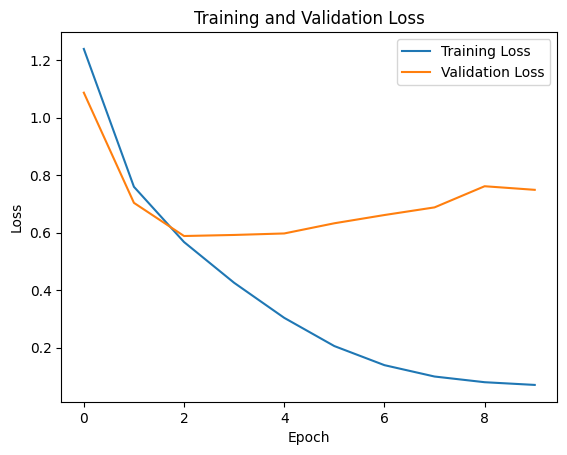

In [14]:

# Print final validation accuracy
print(f'Final Validation Accuracy: {val_accuracy_list[-1]}%')
# Calculate total number of parameters
total_params = sum(p.numel() for p in net.parameters())
print(f'Total number of parameters in the model: {total_params}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/ResNet_training_validation_loss.png')
plt.show()

Introduced Dropout for the below networks

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Simplified AlexNet model with added dropout for CIFAR-10
model = models.Sequential([
    layers.Conv2D(48, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),  # Dropout added after pooling

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),  # Additional dropout

    layers.Conv2D(192, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.25),  # Additional dropout

    layers.Conv2D(192, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),  # Additional dropout

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Existing dropout retained

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Existing dropout retained

    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))




# After training, you can evaluate the model and print out the performance metrics as before.



Epoch 1/10
1563/1563 [==============================] - 199s 126ms/step - loss: 1.7722 - accuracy: 0.3232 - val_loss: 1.4083 - val_accuracy: 0.4849
Epoch 2/10
1563/1563 [==============================] - 201s 128ms/step - loss: 1.3978 - accuracy: 0.5013 - val_loss: 1.3227 - val_accuracy: 0.5271
Epoch 3/10
1563/1563 [==============================] - 197s 126ms/step - loss: 1.2932 - accuracy: 0.5440 - val_loss: 1.1718 - val_accuracy: 0.5936
Epoch 4/10
1563/1563 [==============================] - 202s 129ms/step - loss: 1.2172 - accuracy: 0.5763 - val_loss: 1.0596 - val_accuracy: 0.6342
Epoch 5/10
1563/1563 [==============================] - 199s 127ms/step - loss: 1.1692 - accuracy: 0.5945 - val_loss: 1.0112 - val_accuracy: 0.6572
Epoch 6/10
1563/1563 [==============================] - 197s 126ms/step - loss: 1.1304 - accuracy: 0.6118 - val_loss: 1.0044 - val_accuracy: 0.6542
Epoch 7/10
1563/1563 [==============================] - 199s 127ms/step - loss: 1.0934 - accuracy: 0.6260 - val_

The network is made more complex with more droput layers in the below code. We see the accuracy imprroved a bit.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Modified AlexNet model with increased dropout for CIFAR-10
model = models.Sequential([
    layers.Conv2D(48, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Dropout(0.2),  # Increased initial dropout after the first conv layer
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.3),  # Increased dropout after the second conv layer
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(192, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.4),  # Further increase dropout after the third conv layer

    layers.Conv2D(192, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.4),  # Maintaining higher dropout rate

    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Retained dropout before the dense layers

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Retained dropout before the last dense layer

    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

model.summary()

# Access the history to get training and validation loss and accuracy
training_loss = history.history['loss'][-1]
validation_loss = history.history['val_loss'][-1]
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Loss: {training_loss}")
print(f"Final Validation Loss: {validation_loss}")
print(f"Final Training Accuracy: {training_accuracy}")
print(f"Final Validation Accuracy: {validation_accuracy}")

# Print the total number of parameters
total_params = model.count_params()
print(f"Total number of parameters: {total_params}")




Epoch 1/10
1563/1563 [==============================] - 228s 144ms/step - loss: 1.6813 - accuracy: 0.3679 - val_loss: 1.4710 - val_accuracy: 0.5068
Epoch 2/10
1563/1563 [==============================] - 220s 140ms/step - loss: 1.3553 - accuracy: 0.5154 - val_loss: 1.3892 - val_accuracy: 0.5086
Epoch 3/10
1563/1563 [==============================] - 223s 143ms/step - loss: 1.2393 - accuracy: 0.5652 - val_loss: 1.2501 - val_accuracy: 0.5878
Epoch 4/10
1563/1563 [==============================] - 226s 145ms/step - loss: 1.1630 - accuracy: 0.5977 - val_loss: 1.1773 - val_accuracy: 0.6188
Epoch 5/10
1563/1563 [==============================] - 228s 146ms/step - loss: 1.1128 - accuracy: 0.6174 - val_loss: 1.1236 - val_accuracy: 0.6168
Epoch 6/10
1563/1563 [==============================] - 223s 143ms/step - loss: 1.0619 - accuracy: 0.6380 - val_loss: 1.0917 - val_accuracy: 0.6451
Epoch 7/10
1563/1563 [==============================] - 224s 143ms/step - loss: 1.0265 - accuracy: 0.6503 - val_


## ResNet 18
The baseline model we did in lectures is called ResNet-11. Build a new version of ResNet (ResNet-18). Train it on CIFAR-10. Plot the training loss, validation loss, and validation accuracy. Compare the classification accuracy, and model size across the two versions of ResNet (11, 18). How does the complexity grow as you increase the network depth?

You can find some references for ResNet 18 here:

https://www.kaggle.com/code/ivankunyankin/resnet18-from-scratch-using-pytorchLinks to an external site.

Explore the dropout option for the two networks and report your training results and validation accuracy.

Epoch 1/10
782/782 [==============================] - 32s 27ms/step - loss: 1.4457 - accuracy: 0.4946 - val_loss: 1.4011 - val_accuracy: 0.5125
Epoch 2/10
782/782 [==============================] - 20s 25ms/step - loss: 1.0405 - accuracy: 0.6328 - val_loss: 1.0850 - val_accuracy: 0.6157
Epoch 3/10
782/782 [==============================] - 21s 27ms/step - loss: 0.8568 - accuracy: 0.7008 - val_loss: 1.4295 - val_accuracy: 0.5286
Epoch 4/10
782/782 [==============================] - 20s 26ms/step - loss: 0.7310 - accuracy: 0.7456 - val_loss: 0.9111 - val_accuracy: 0.6851
Epoch 5/10
782/782 [==============================] - 20s 25ms/step - loss: 0.6326 - accuracy: 0.7799 - val_loss: 0.9583 - val_accuracy: 0.6699
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 0.5447 - accuracy: 0.8104 - val_loss: 0.9306 - val_accuracy: 0.6972
Epoch 7/10
782/782 [==============================] - 20s 26ms/step - loss: 0.4649 - accuracy: 0.8377 - val_loss: 0.8664 - val_accuracy:

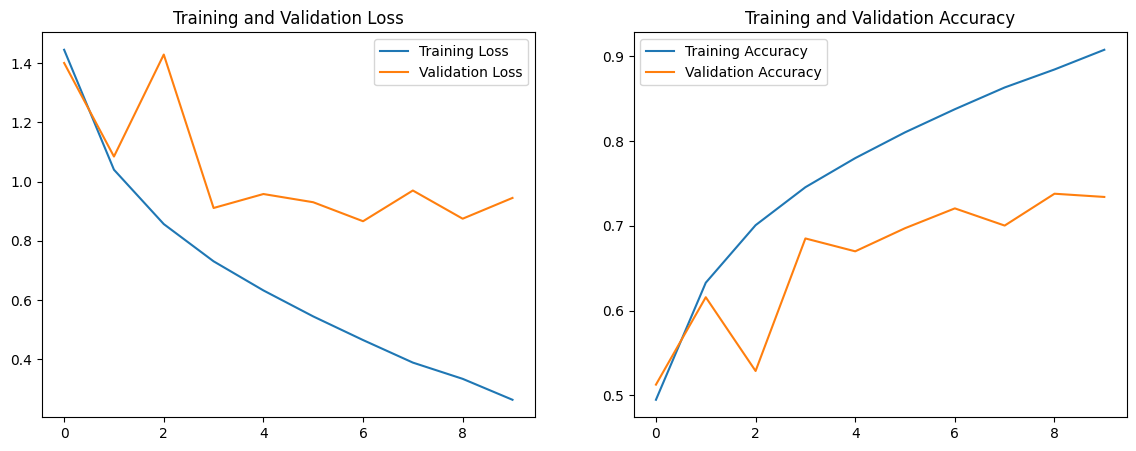

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Define a function for a Residual Block
def resnet_block(inputs, num_filters, stride=1, conv_shortcut=False):
    x = layers.Conv2D(num_filters, 3, padding='same', strides=stride, kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(num_filters, 3, padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    if conv_shortcut:
        shortcut = layers.Conv2D(num_filters, 1, strides=stride, padding='same', kernel_initializer='he_normal')(inputs)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = inputs

    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Building the ResNet-18 Model
def build_resnet18(input_shape=(32, 32, 3), classes=10):
    inputs = layers.Input(shape=input_shape)

    # Initial Convolution and MaxPool
    x = layers.Conv2D(64, 7, strides=2, padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual Blocks
    x = resnet_block(x, 64, conv_shortcut=True)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, stride=2, conv_shortcut=True)
    x = resnet_block(x, 128)
    x = resnet_block(x, 256, stride=2, conv_shortcut=True)
    x = resnet_block(x, 256)
    x = resnet_block(x, 512, stride=2, conv_shortcut=True)
    x = resnet_block(x, 512)

    # Final Layers
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(classes, activation='softmax')(x)

    # Instantiate and Compile Model
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate and train the model
resnet18 = build_resnet18()
history = resnet18.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=64)

# Print final validation accuracy
print(f'Final Validation Accuracy: {val_accuracy_list[-1]}%')
# Calculate total number of parameters
total_params = sum(p.numel() for p in net.parameters())
print(f'Total number of parameters in the model: {total_params}')

# Plotting training/validation loss and accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()




Below is the ResNet 11 model`

ResNet11(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(12

100%|██████████| 170498071/170498071 [00:05<00:00, 29175383.45it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Training loss: 1.2394830474316578, Validation loss: 1.0872253261435145, Validation Accuracy: 62.21%
Epoch 2, Training loss: 0.7598015934858121, Validation loss: 0.7039696470426675, Validation Accuracy: 75.72%
Epoch 3, Training loss: 0.5676086947503032, Validation loss: 0.5885367904798672, Validation Accuracy: 80.01%
Epoch 4, Training loss: 0.4257912688858221, Validation loss: 0.5922066890679228, Validation Accuracy: 80.41%
Epoch 5, Training loss: 0.3038374158891629, Validation loss: 0.5974128119671307, Validation Accuracy: 80.96%
Epoch 6, Training loss: 0.2056112182710942, Validation loss: 0.6328512864371839, Validation Accuracy: 81.41%
Epoch 7, Training loss: 0.13919425535436436, Validation loss: 0.6615478656828975, Validation Accuracy: 82.17%
Epoch 8, Training loss: 0.09964678202480463, Validation loss: 0.6881262636936891, Validation Accuracy: 81.74%
Epoch 9, Training loss: 0.07985439507

FileNotFoundError: [Errno 2] No such file or directory: 'temp/ResNet_training_validation_loss.png'

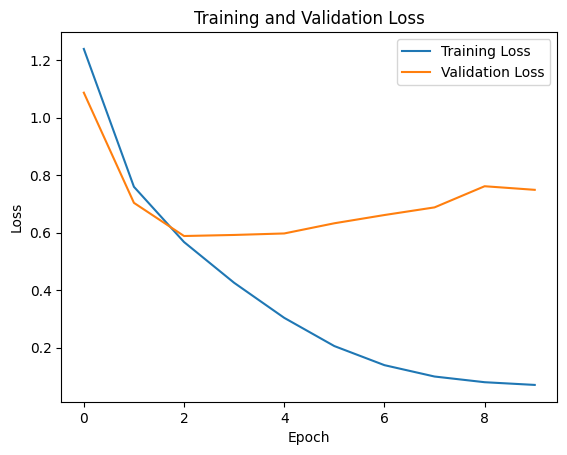

In [2]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F  # Functional module for activation functions and more
import torch.optim as optim
import matplotlib.pyplot as plt

class BasicBlock(nn.Module):
    expansion = 1  # Expansion factor to adjust the number of output channels if needed

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        # First convolutional layer of the block
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)  # Batch normalization after the first convolution

        # Second convolutional layer of the block
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)  # Batch normalization after the second convolution

        # Shortcut connection to match input and output dimensions if necessary
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        # Forward pass through the first convolution, batch norm, and ReLU activation
        out = F.relu(self.bn1(self.conv1(x)))
        # Forward pass through the second convolution and batch norm
        out = self.bn2(self.conv2(out))
        # Adding the shortcut connection's output to the main path's output
        out += self.shortcut(x)
        # Final ReLU activation after adding the shortcut
        out = F.relu(out)
        return out

class ResNet11(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet11, self).__init__()
        self.in_channels = 64  # Initial number of input channels

        # Initial convolutional layer before entering the residual blocks
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)  # Batch normalization after the initial convolution

        # Creating layers of blocks with increasing channel sizes
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)

        # Final fully connected layer for classification
        self.linear = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        # Helper function to create a layer with specified blocks
        strides = [stride] + [1]*(num_blocks-1)  # First block could have a stride and the rest have stride of 1
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion  # Update in_channels for the next block
        return nn.Sequential(*layers)

    def forward(self, x):
        # Forward pass through the initial convolution, batch norm, and ReLU activation
        out = F.relu(self.bn1(self.conv1(x)))
        # Forward pass through all the layers of blocks
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        # Global average pooling before the final layer
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)  # Flatten the output for the fully connected layer
        out = self.linear(out)  # Final classification layer
        return out

#ResNet11:have 11 layers in total, including convolutional and fully connected layers.
#it could have 4 residual blocks with a varying number of convolutional layers in each block to make up a total of 11 layers.

# Example of using the ResNet11 model
model = ResNet11(BasicBlock, [1, 1, 1, 1], num_classes=10)  # 4 blocks with 1 layer each
print(model)


# Check if GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load and preprocess CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

# Define the network, loss function, and optimizer
net = model.to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr=0.001)
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Lists for storing loss values and validation accuracy
train_loss_list = []
val_loss_list = []
val_accuracy_list = []

# Training and validation loop
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    net.train()  # Set the model to training mode
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss_list.append(running_loss / len(trainloader))

    # Validation loop
    running_loss = 0.0
    correct = 0
    total = 0
    net.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss_list.append(running_loss / len(testloader))
    val_accuracy = 100 * correct / total
    val_accuracy_list.append(val_accuracy)

    print(f'Epoch {epoch + 1}, Training loss: {train_loss_list[-1]}, Validation loss: {val_loss_list[-1]}, Validation Accuracy: {val_accuracy}%')

# Print final validation accuracy
print(f'Final Validation Accuracy: {val_accuracy_list[-1]}%')
# Calculate total number of parameters
total_params = sum(p.numel() for p in net.parameters())
print(f'Total number of parameters in the model: {total_params}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/ResNet_training_validation_loss.png')
plt.show()

In [4]:
ls -al

total 20
drwxr-xr-x 1 root root 4096 Feb 15 22:59 ./
drwxr-xr-x 1 root root 4096 Feb 15 22:36 ../
drwxr-xr-x 4 root root 4096 Feb 14 14:27 .config/
drwxr-xr-x 3 root root 4096 Feb 15 23:00 data/
drwxr-xr-x 1 root root 4096 Feb 14 14:28 sample_data/


In [5]:
mkdir temp



Final Validation Accuracy: 82.57%
Total number of parameters in the model: 4903242


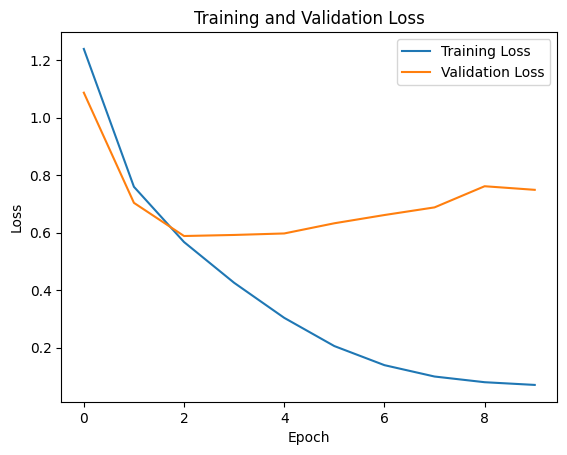

In [6]:
# Print final validation accuracy
print(f'Final Validation Accuracy: {val_accuracy_list[-1]}%')
# Calculate total number of parameters
total_params = sum(p.numel() for p in net.parameters())
print(f'Total number of parameters in the model: {total_params}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/ResNet_training_validation_loss.png')
plt.show()

Resnet 18 with drop out

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18

# Assuming you have a ResNet18WithDropout class defined as before

class ResNet18WithDropout(nn.Module):
    def __init__(self, dropout_rate=0.5, num_classes=10):
        super(ResNet18WithDropout, self).__init__()
        # Load a pre-trained ResNet-18 model
        self.resnet18 = models.resnet18(pretrained=False)
        # Modify the final fully connected layer to match the number of classes
        num_ftrs = self.resnet18.fc.in_features
        self.resnet18.fc = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(num_ftrs, num_classes)
        )

    def forward(self, x):
        return self.resnet18(x)

# CIFAR-10 Data loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Model, Loss function, and Optimizer
model = ResNet18WithDropout(dropout_rate=0.5, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Function to calculate accuracy
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Print average training loss per epoch
        train_loss = running_loss / len(trainloader)
        print(f'Epoch {epoch+1}, Training loss: {train_loss:.4f}')

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        for inputs, labels in testloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

        val_loss = val_running_loss / len(testloader)
        val_accuracy = calculate_accuracy(testloader, model)
        print(f'Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=10)







Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Training loss: 1.7171
Epoch 1, Validation Loss: 1.3853, Validation Accuracy: 48.51%
Epoch 2, Training loss: 1.3248
Epoch 2, Validation Loss: 1.1979, Validation Accuracy: 55.95%
Epoch 3, Training loss: 1.1361
Epoch 3, Validation Loss: 1.1316, Validation Accuracy: 59.96%
Epoch 4, Training loss: 0.9951
Epoch 4, Validation Loss: 1.0455, Validation Accuracy: 62.96%
Epoch 5, Training loss: 0.8732
Epoch 5, Validation Loss: 1.0243, Validation Accuracy: 63.96%
Epoch 6, Training loss: 0.7669
Epoch 6, Validation Loss: 1.0206, Validation Accuracy: 65.13%
Epoch 7, Training loss: 0.6578
Epoch 7, Validation Loss: 1.0658, Validation Accuracy: 65.58%
Epoch 8, Training loss: 0.5706
Epoch 8, Validation Loss: 1.0993, Validation Accuracy: 65.38%
Epoch 9, Training loss: 0.4847
Epoch 9, Validation Loss: 1.1220, Validation Accuracy: 65.40%
Epoch 10, Training loss: 0.4142
Epoch 10, Validation Loss: 1.1821, Validation Accuracy: 66.47%
